In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('out/results.csv')
df["workers"] = df["workers"] - 1
df.sort_values(by=['workers'], inplace=True)
df

,workers,tasks,time,run
639,1,50,6.305171,10
638,1,50,6.278052,9
620,1,100,6.788108,1
621,1,100,6.332122,2
622,1,100,6.233332,3
...,...,...,...,...
613,32,50,1.580410,4
612,32,50,1.620439,3
611,32,50,1.823507,2
303,32,100,1.677250,4


In [74]:
sns.set_theme(style="darkgrid")

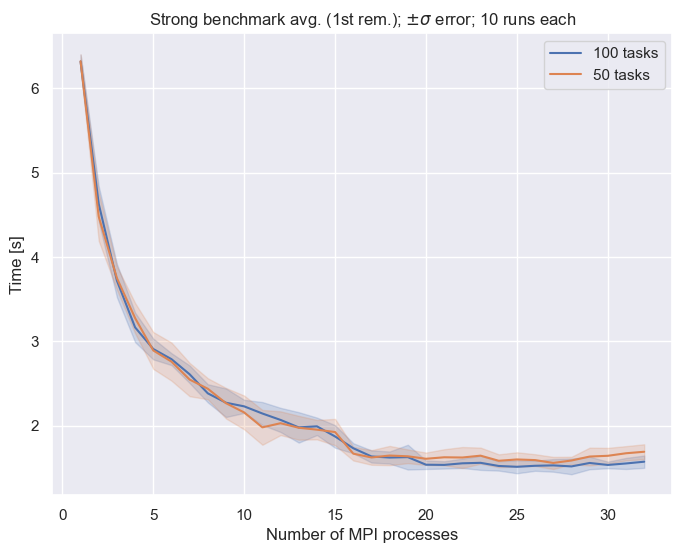

In [75]:
plt.figure(figsize=(8, 6))

def plot_strong(data, label):

    # drop first run (warmup)
    data = data.drop(data[data["run"] == 1].index)

    sns.lineplot(x="workers", y="time", data=data, errorbar="sd", label=label)

plot_strong(df[df['tasks'] == 100], "100 tasks")
plot_strong(df[df['tasks'] == 50], "50 tasks")

plt.xlabel("Number of MPI processes")
plt.ylabel("Time [s]")

# add grid
plt.grid(True)

plt.title(f"Strong benchmark avg. (1st rem.); $\pm\sigma$ error; 10 runs each")

plt.savefig(f"../../../report/plots/py_mandel/strong_scaling.svg")
plt.show()

/var/folders/cp/1r3tmfrx0wd8llj7cqxylwyh0000gn/T/ipykernel_7280/351593851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["speedup"] = avg_time_single / data["time"]
/var/folders/cp/1r3tmfrx0wd8llj7cqxylwyh0000gn/T/ipykernel_7280/351593851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["speedup"] = avg_time_single / data["time"]


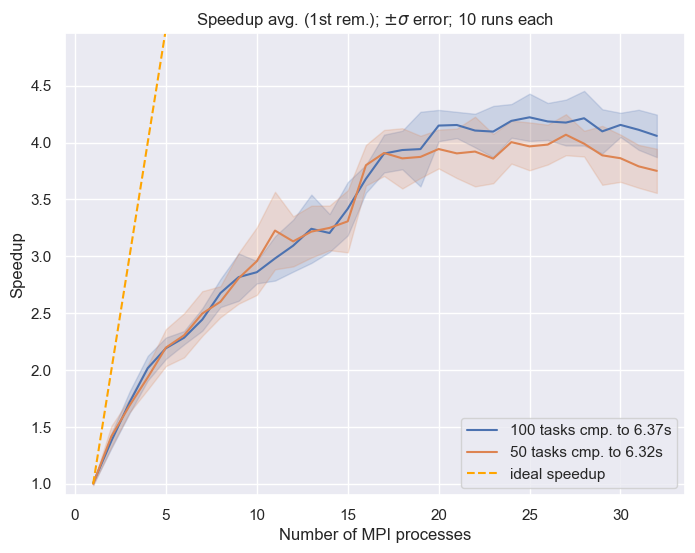

In [78]:
plt.figure(figsize=(8, 6))


def plot_speeup(data, label):
    avg_time_single = data[data["workers"] == df["workers"].min()]["time"].mean()
    # calculate speedup (using avg time of # process)
    data["speedup"] = avg_time_single / data["time"]

    # drop first run (warmup)
    data = data.drop(data[data["run"] == 1].index)

    sns.lineplot(
        x="workers",
        y="speedup",
        data=data,
        #marker="o",
        label=f"{label} cmp. to {avg_time_single:.2f}s",
        errorbar="sd"
    )

    return data["speedup"].max()


max_value = max(
    plot_speeup(df[df['tasks'] == 100], "100 tasks"),
    plot_speeup(df[df['tasks'] == 50], "50 tasks")
)

max_workers = df["workers"].max()

# add speedup line
plt.plot([1, max_workers], [1, max_workers], linestyle="--",
         color="orange", label="ideal speedup")

plt.xlabel("Number of MPI processes")
plt.ylabel("Speedup")
# add legend in bottom right
plt.legend(loc='lower right')
plt.ylim(0.9, max_value * 1.1)

plt.grid(True)

plt.title(f"Speedup avg. (1st rem.); $\pm\sigma$ error; 10 runs each")

plt.savefig(f"../../../report/plots/py_mandel/speedup.svg")

plt.show()